<a href="https://colab.research.google.com/github/KietHuynh02/GiuaKy/blob/main/Face_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = 'drive/MyDrive/Class_Photo/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Anhkiet '):
    output = 1.0
  if file.startswith('Binh '):
    output = 2.0
  if file.startswith('Dangkhoa '):
    output = 3.0
  if file.startswith('Dat '):
    output = 4.0
  if file.startswith('Dung '):
    output = 5.0
  if file.startswith('Ha '):
    output = 6.0
  if file.startswith('Hau '):
    output = 7.0
  if file.startswith('Hieu '):
    output = 8.0
  if file.startswith('Hoaiphong '):
    output = 9.0
  if file.startswith('Hoang '):
    output = 10.0
  if file.startswith('Huy '):
    output = 11.0
  if file.startswith('KyAnh '):
    output = 12.0
  if file.startswith('Loc '):
    output = 13.0
  if file.startswith('Long '):
    output = 14.0
  if file.startswith('Luan '):
    output = 15.0
  if file.startswith('Minh '):
    output = 16.0
  if file.startswith('Ngocthach '):
    output = 17.0
  if file.startswith('Nhathuy '):
    output = 18.0
  if file.startswith('Phat '):
    output = 19.0
  if file.startswith('Phuc '):
    output = 20.0
  if file.startswith('Quanghuy '):
    output = 21.0
  if file.startswith('Quangphuc '):
    output = 22.0
  if file.startswith('Sang '):
    output = 23.0
  if file.startswith('Thai '):
    output = 24.0
  if file.startswith('Tung '):
    output = 25.0

  photo = load_img(folder + file, target_size =(30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Train
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape,labels_train.shape)

(1125, 30, 40, 3) (1125,)


In [ ]:
folder = 'drive/MyDrive/Class_Photo_Test/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Anhkiet '):
    output = 1.0
  if file.startswith('Binh '):
    output = 2.0
  if file.startswith('Dangkhoa '):
    output = 3.0
  if file.startswith('Dat '):
    output = 4.0
  if file.startswith('Dung '):
    output = 5.0
  if file.startswith('Ha '):
    output = 6.0
  if file.startswith('Hau '):
    output = 7.0
  if file.startswith('Hieu '):
    output = 8.0
  if file.startswith('Hoaiphong '):
    output = 9.0
  if file.startswith('Hoang '):
    output = 10.0
  if file.startswith('Huy '):
    output = 11.0
  if file.startswith('Kyanh '):
    output = 12.0
  if file.startswith('Loc '):
    output = 13.0
  if file.startswith('Long '):
    output = 14.0
  if file.startswith('Luan '):
    output = 15.0
  if file.startswith('Minh '):
    output = 16.0
  if file.startswith('Ngocthach '):
    output = 17.0
  if file.startswith('Nhathuy '):
    output = 18.0
  if file.startswith('Phat '):
    output = 19.0
  if file.startswith('Phuc '):
    output = 20.0
  if file.startswith('Quanghuy '):
    output = 21.0
  if file.startswith('Quangphuc '):
    output = 22.0
  if file.startswith('Sang '):
    output = 23.0
  if file.startswith('Thai '):
    output = 24.0
  if file.startswith('Tung '):
    output = 25.0

  photo = load_img(folder + file, target_size =(30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

# Test
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape,labels_test.shape)

(375, 30, 40, 3) (375,)


In [ ]:
class_Image =    {1: 'AnhKiet',2: 'Binh',3: 'DangKhoa',
                  4: 'Dat',5: 'Dung',6: 'Ha',
                  7: 'Hau',8: 'Hieu',9: 'HoaiPhong',
                  10: 'Hoang', 11: 'Huy',12: 'KyAnh',13: 'Loc',
                  14: 'Long',15: 'Luan',16: 'Minh',
                  17: 'NgocThach',18: 'NhatHuy',19: 'Phat',
                  20: 'Phuc', 21: 'QuangHuy',22: 'QuangPhuc',23: 'Sang',
                  24: 'Thai',25: 'Tung'}

In [ ]:
#Reshape the sets and rescale within the byte range
photos_train = photos_train.reshape(1125,30,40,3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape(375,30,40, 3)
photos_test = photos_test.astype('float32')/255

In [ ]:
# One-hot encode the target classes
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [ ]:
(photos_train.shape, labels_train.shape),(photos_test.shape, labels_test.shape)

(((1125, 30, 40, 3), (1125, 26)), ((375, 30, 40, 3), (375, 26)))

In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epochs = 50
classes = 26

model = Sequential()
# CNN
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(30,40,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))
#_________________________________________________________

model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#__________________________________________________________

model.add(Conv2D(128,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(256,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(512,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
# ANN
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes ,activation = 'softmax'))

# Compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac cua ham', test_acc)
print('Ham mat mat', test_loss)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [ ]:
model.save('drive/MyDrive/modelImage.h5')

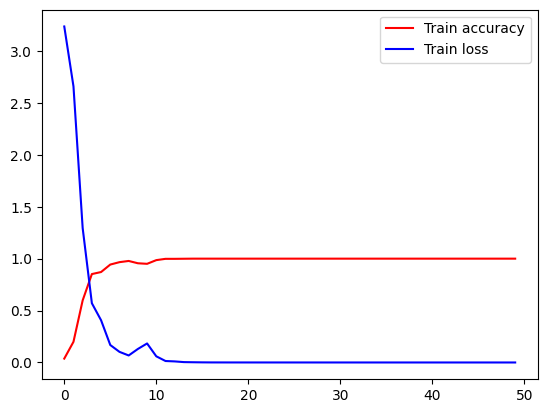

In [ ]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

1/1 [==============================] - 0s 99ms/step
Predicted:  AnhKiet


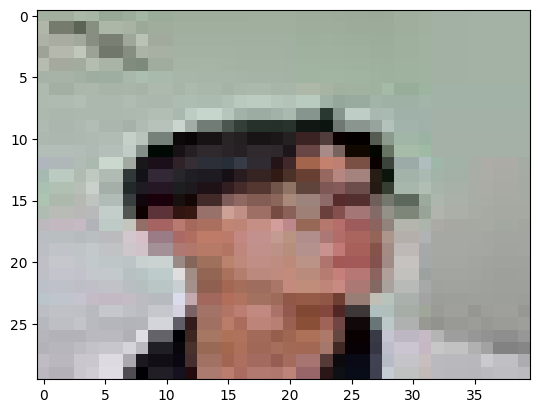

In [ ]:
#test
import numpy as np 
filePath = '/content/drive/MyDrive/Anhkiet.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Image[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 19ms/step
Predicted:  Huy


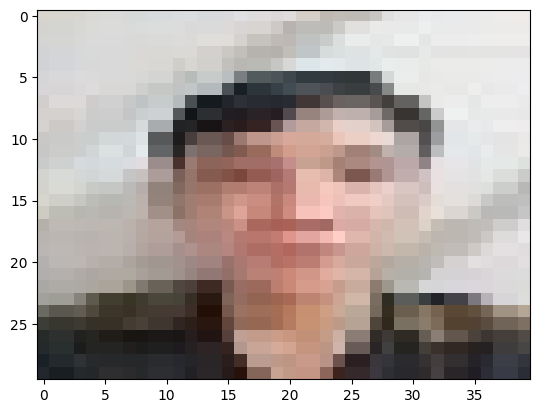

In [ ]:
import numpy as np 
filePath = '/content/drive/MyDrive/Huy.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Image[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 29ms/step
Predicted:  Long


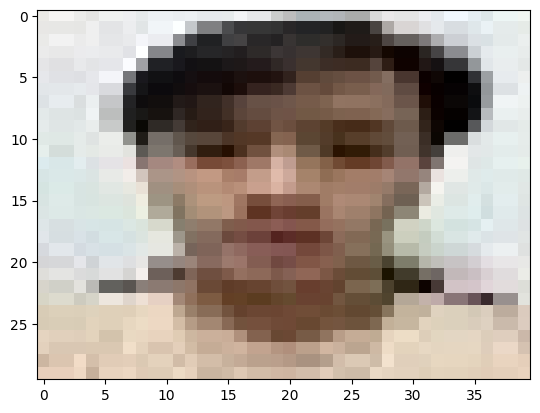

In [ ]:
import numpy as np 
filePath = '/content/drive/MyDrive/Long.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Image[pred])
plt.imshow(testImage)